## Imports


In [ ]:
!pip install easyocr
import numpy as np
import cv2 as cv
import imutils
from matplotlib import pyplot as plt
import easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 1.7 MB/s eta 0:00:00


## Load and Preprocess Image


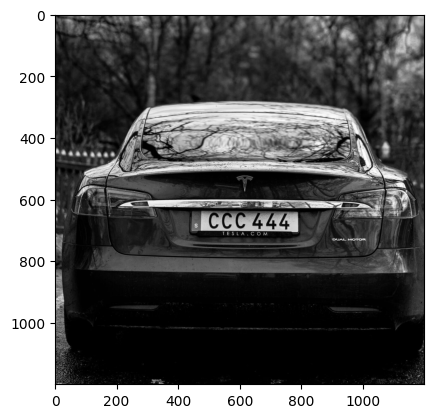

In [ ]:
car_img = cv.imread("/content/drive/MyDrive/Colab Notebooks/dataset-card.jpg")
car_img_gray = cv.cvtColor (car_img, cv.COLOR_BGR2GRAY)
plt.imshow (cv.cvtColor(car_img_gray, cv.COLOR_BGR2RGB))

##Edge Detection

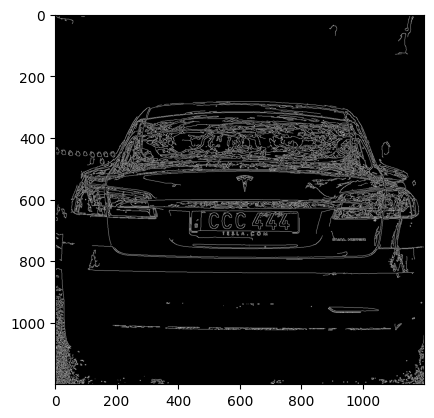

In [ ]:
blateral_filtered = cv.bilateralFilter(car_img_gray, 11, 15, 15)
edges = cv.Canny (blateral_filtered, 30, 200)
plt.imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))

## Contour Detection


In [ ]:
contours = cv.findContours(edges.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_refined = imutils.grab_contours(contours)
contours_sorted = sorted(contours_refined, key=cv.contourArea, reverse=True)[:4]

## Plate Localization


In [ ]:
for contour in contours_sorted:
    contour_approx = cv.approxPolyDP(contour, 10, True)
    if len(contour_approx) == 4:
        plate_location = contour_approx
        break

In [ ]:
plate_location

array([[[474, 639]],

       [[784, 641]],

       [[789, 703]],

       [[473, 702]]], dtype=int32)

## Generate Plate Mask and Apply Bitwise Operation


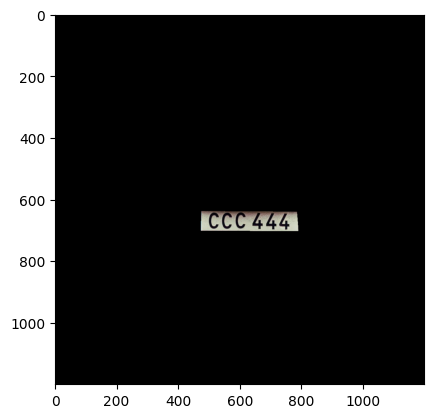

In [ ]:
plate_mask0 = np.zeros (car_img_gray.shape, np.uint8)
plate_mask = cv.drawContours(plate_mask0, [plate_location], 0, 255, -1)
plate_img = cv.bitwise_and(car_img, car_img, mask = plate_mask)
plt.imshow(cv.cvtColor(plate_img, cv.COLOR_BGR2RGB))

## Save Plate Image


In [ ]:
cv.imwrite("/content/drive/MyDrive/Colab Notebooks/PlateCar.jpg", plate_img)

True

## Load Plate Image and Process


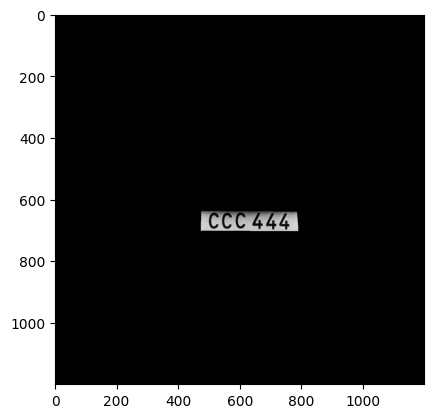

In [ ]:
car_img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PlateCar.jpg")
car_plate_img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PlateCar.jpg", 0)
plt.imshow (cv.cvtColor(car_plate_img, cv.COLOR_BGR2RGB))

In [ ]:
cv.imwrite("/content/sample_data/Sepideh/Plate Car.jpg", plate_img)


False

## Extract Cropped Image


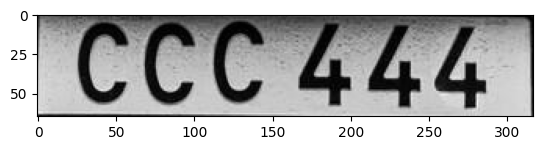

In [ ]:
(x,y) = np.where (plate_mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = car_img_gray [x1:x2+1, y1:y2+1]
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))

## Save cropped Image


In [ ]:
cv.imwrite("/content/drive/MyDrive/Colab Notebooks/Carcropped.jpg", cropped_image)

True

## Perform OCR on Cropped Image and  Display Plate Text



In [ ]:
reader = easyocr.Reader(['en'])
plate_text = reader.readtext(car_plate_img)
print (plate_text)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[488, 631], [773, 631], [773, 709], [488, 709]], 'CCC 444', 0.4993715560758341)]
